<a href="https://colab.research.google.com/github/RissanX/food-sales-predicitons/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')
filename='/content/drive/MyDrive/DataSets/sales_predictions_2023.csv'
df= pd.read_csv(filename)
df.head()

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.drop_duplicates(['Item_Identifier'],inplace=True)

In [5]:
df.drop(columns='Item_Identifier',inplace=True)

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    929
Regular    532
LF          61
reg         19
low fat     18
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    1008
Regular     551
Name: Item_Fat_Content, dtype: int64

In [8]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

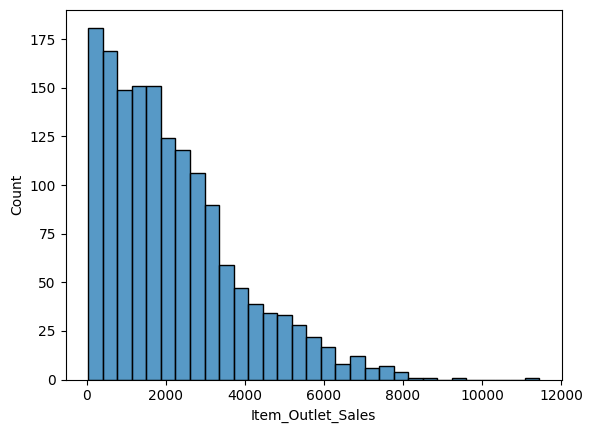

In [15]:
sns.histplot(data=df, x='Item_Outlet_Sales', y=None, hue=None,  stat='count', bins='auto')

<Axes: xlabel='Item_Weight', ylabel='Count'>

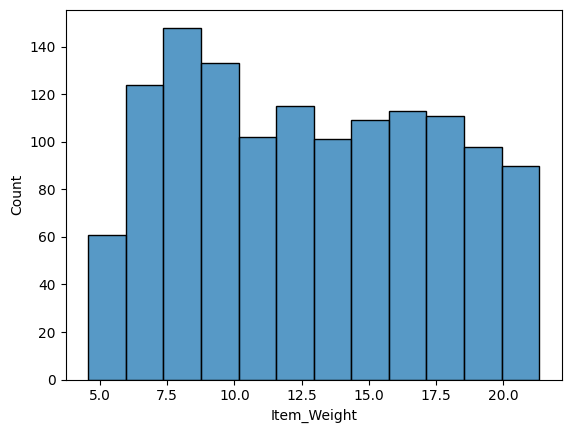

In [14]:
sns.histplot(data=df, x='Item_Weight', y=None, bins='auto')

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

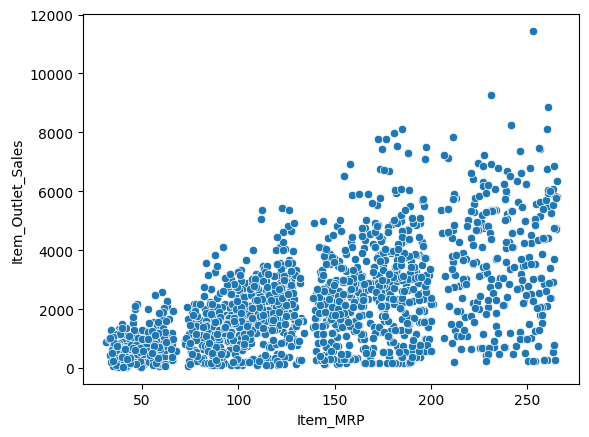

In [11]:
sns.scatterplot (data=df, x='Item_MRP', y='Item_Outlet_Sales')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [17]:
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [18]:
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

In [19]:
num_tuple = (num_processor, num_selector)
cat_tuple = (cat_processor, cat_selector)

In [20]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [21]:
X_train_processed = col_transformer.fit(X_train)
X_train_transformed = col_transformer.transform(X_train)

X_test_transformed = col_transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
linreg = LinearRegression()
model_pipe_LR = make_pipeline(col_transformer, linreg)
model_pipe_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b27a125cca0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b27a1553af0>)])),
                ('linearregression', LinearRegression())])

In [23]:
y_pred_train = model_pipe_LR.predict(X_train)

y_pred_test = model_pipe_LR.predict(X_test)

In [24]:
def eval_model(true, pred):
  MAE = mean_absolute_error(true, pred)
  MSE = mean_squared_error(true, pred)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(true, pred)

  print(f'MAE: {MAE:,.2f} \n MSE: {MSE:,.2f} \n RMSE: {RMSE:,.2f} \n R2: {r2:,.2f} ')

In [25]:
print('Train Evaluation''\n')
eval_model(y_train, y_pred_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test, y_pred_test)

Train Evaluation

MAE: 817.39 
 MSE: 1,189,581.76 
 RMSE: 1,090.68 
 R2: 0.55 


Test Evaluation

MAE: 933.77 
 MSE: 1,590,336.22 
 RMSE: 1,261.09 
 R2: 0.54 


In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [28]:
model_pipe_DTR = make_pipeline(col_transformer, dec_tree)

In [29]:
model_pipe_DTR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b27a125cca0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b27a1553af0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [30]:
model_pipe_DTR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b27a125cca0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b27a1553af0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [31]:
train_preds1 = model_pipe_DTR.predict(X_train)
test_preds1 = model_pipe_DTR.predict(X_test)

In [32]:
train_score1 = r2_score(y_train, train_preds1)
test_score1 = r2_score(y_test, test_preds1)
print(train_score1)
print(test_score1)

1.0
0.18735509694558672


In [33]:
print('Train Evaluation''\n')
eval_model(y_train, train_preds1)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test,test_preds1)

Train Evaluation

MAE: 0.00 
 MSE: 0.00 
 RMSE: 0.00 
 R2: 1.00 


Test Evaluation

MAE: 1,152.86 
 MSE: 2,832,203.63 
 RMSE: 1,682.92 
 R2: 0.19 


* Overall it is clear the model that we will be using which is the linear regression model and that's because it has a lower rmse score and higher R2 score on the test set